In [126]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    %load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os
from Model.Core.model import make_model

import tensorflow as tf
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv(override=True)


True

In [127]:
BATCH_SIZE = int(os.getenv("BATCH_SIZE"))
IMG_SIZE = eval(os.getenv("IMG_SIZE"))
train_path = os.getenv("train")
val_path = os.getenv("val")
test_path = os.getenv("test")

In [128]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                               shear_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               save_to_dir='./../Data/train')
val_image_gen = image_gen.flow_from_directory(val_path,
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical', shuffle=False,
                                                save_to_dir='./../Data/val')
test_image_gen = image_gen.flow_from_directory(test_path,
                                              target_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical', shuffle=False,
                                              save_to_dir='./../Data/test')

Found 320 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [129]:

def load_dataset(path, image_size,batch_size,shuffle=True ):
    train_dataset = None
    try:
        train_dataset = tf.keras.utils.image_dataset_from_directory(path,
                                                                    shuffle=shuffle,
                                                                    batch_size=batch_size,
                                                                    image_size=image_size,
                                                                    )
    except:
        raise
    return train_dataset
print("train path: ", train_path)
print("val path: ", val_path)
print("test path: ", test_path)

train path:  C:\Users\ziad\Desktop\origin\train
val path:  C:\Users\ziad\Desktop\origin\validation
test path:  C:\Users\ziad\Desktop\origin\test


In [130]:
"""train = load_dataset(train_path, IMG_SIZE, BATCH_SIZE)
val = load_dataset(val_path,  IMG_SIZE, BATCH_SIZE)
tset = load_dataset(test_path, IMG_SIZE, BATCH_SIZE)"""

'train = load_dataset(train_path, IMG_SIZE, BATCH_SIZE)\nval = load_dataset(val_path,  IMG_SIZE, BATCH_SIZE)\ntset = load_dataset(test_path, IMG_SIZE, BATCH_SIZE)'

In [131]:
IMG_SHAPE = IMG_SIZE + (3,)
print(IMG_SHAPE)
print(BATCH_SIZE)

(216, 384, 3)
32


In [132]:
model = make_model(batch=BATCH_SIZE, shape=IMG_SHAPE)

In [133]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 216, 384, 3)]     0         
                                                                 
 sequential_11 (Sequential)  (None, 216, 384, 3)       0         
                                                                 
 tf.__operators__.getitem_11  (None, 216, 384, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_11 (TFOpLamb  (None, 216, 384, 3)      0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 12, 2048)       23587712  
                                                                 
 global_average_pooling2d_11  (None, 2048)             0  

In [134]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

In [135]:
history = model.fit(train_image_gen,
                    epochs=300,
                    validation_data=val_image_gen) 

Epoch 1/300
10/10 [==============================] - 22s 2s/step - loss: 0.7728 - accuracy: 0.5000 - val_loss: 0.7122 - val_accuracy: 0.5000
Epoch 2/300
10/10 [==============================] - 17s 2s/step - loss: 0.7686 - accuracy: 0.5000 - val_loss: 0.7135 - val_accuracy: 0.5000
Epoch 3/300
10/10 [==============================] - 16s 2s/step - loss: 0.7614 - accuracy: 0.5000 - val_loss: 0.7082 - val_accuracy: 0.5000
Epoch 4/300
10/10 [==============================] - 16s 2s/step - loss: 0.7586 - accuracy: 0.5000 - val_loss: 0.7120 - val_accuracy: 0.5000
Epoch 5/300
 3/10 [========>.....................] - ETA: 9s - loss: 0.7587 - accuracy: 0.5000 

KeyboardInterrupt: 

In [ ]:
modelName = "model.keras"
Location = os.getenv('model_weight')
full_path = os.path.join(Location, modelName)
print(full_path)
model.save(full_path)

.\..\Extraction\Model\model.keras


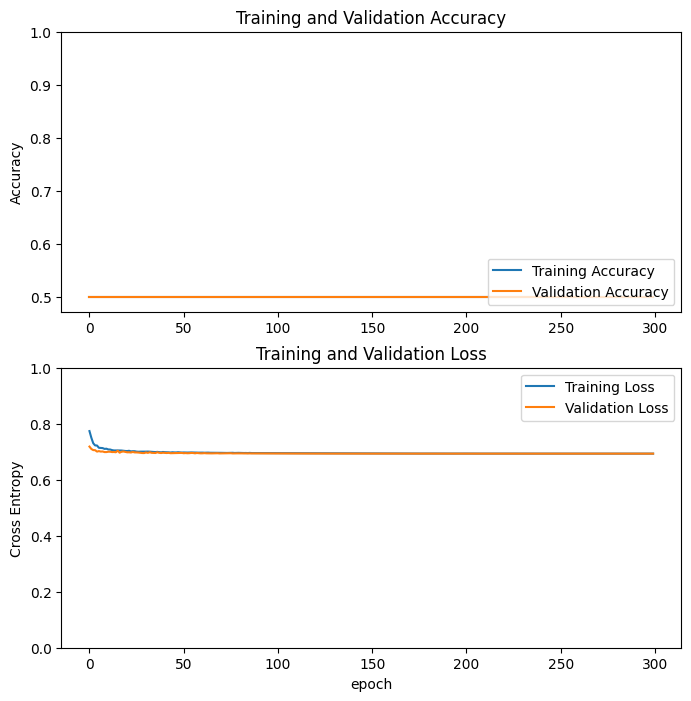

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.evaluate(train_image_gen)

10/10 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5000


[0.6931487917900085, 0.5]

In [ ]:
model.evaluate(val_image_gen)

2/2 [==============================] - 2s 117ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931500434875488, 0.5]

In [ ]:
model.evaluate(test_image_gen)

2/2 [==============================] - 2s 127ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931502223014832, 0.5]